<a href="https://colab.research.google.com/github/ddoddii/Mycolab/blob/master/%E1%84%92%E1%85%A1%E1%86%AF%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B5%E1%86%BB%E1%84%8C%E1%85%ADHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question

**선정이유 및 배경**

데이터마이닝 수업과 실습시간에서 여러가지 전처리 기법들에대해 배웠다. 뇌졸중은 전세계에서 2초에 한명씩 발병하고 6초마다 한명이 죽는 질병으로 한국에서도 3대 사망원인 중 하나이며 사망률 1위를 차지한다. 특히 봄과 같은 환절기에서는 뇌졸증이 증가하며 건강보험심사평가원에 따르면 220년 뇌졸중 환자는 60만 7862명으로 2016년 57만 3379명 대비 6% 증가하였다. 

따라서 뇌졸중을 예방하기위해 성별 나이,질병여부, bmi 등으로 뇌졸중 환자를 예측할 수 있는지 궁금했기에 이번 실습을 진행하였다. 

캐글의 'Stroke Prediction Dataset'을 활용하였다. 범주형으로만 이루어진 변수, 불필요한 변수, 아웃라이어가 있는 변수 등이 있어서 예측을 하기 위해서는 데이터 전처리는 필수적으로 보였다. 또한 EDA를 사용하여 각 변수가 어떠한 형태를 띄고 있는지 어떻게 사용될 수 있는지 살펴보았다. 데이터를 전처리 함으로써 뇌졸중이 어떠한 변수에 크게 영향을 받는지 예측할 수 있는 발판을 마련할 수 있으며 이를 통해 일반인은 뇌졸증을 사전에 예방할 수 있으며, 뇌졸증 환자는 뇌졸증의 원인을 파악해 볼 수 있는 계기를 마련한다. 

# Data 불러오기

드라이브 마운트를 한뒤 stroke.csv데이터를 불러왔다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
stroke_data=pd.read_csv('/content/drive/MyDrive/DataMining/stroke_2.csv')
print(stroke_data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi  stroke  
0           Private          Urban             228.69  36.6       1  
1     S

In [ ]:
features=['age','gender','hypertension','heart_disease', 'ever_married',
          'work_type', 'Residence_type' , 'avg_glucose_level','bmi']#데이터와 관련없는 id 제거
x=stroke_data[features]
y_before=stroke_data['stroke']



In [ ]:
x.head()


,age,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,67.0,Male,0,1,Yes,Private,Urban,228.69,36.6
1,61.0,Female,0,0,Yes,Self-employed,Rural,202.21,NaN
2,80.0,Male,0,1,Yes,Private,Rural,105.92,32.5
3,49.0,Female,0,0,Yes,Private,Urban,171.23,34.4
4,79.0,Female,1,0,Yes,Self-employed,Rural,174.12,24.0


In [ ]:
x.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237
std,22.612647,0.296607,0.226063,45.283560,7.854067
min,0.080000,0.000000,0.000000,55.120000,10.300000
25%,25.000000,0.000000,0.000000,77.245000,23.500000
50%,45.000000,0.000000,0.000000,91.885000,28.100000
75%,61.000000,0.000000,0.000000,114.090000,33.100000
max,82.000000,1.000000,1.000000,271.740000,97.600000


 Y값의 분포가 imblanced한 데이터셋

'0':뇌졸중 발생 x (4861명)

'1':뇌졸중 발생 (249명)

In [ ]:
y=pd.DataFrame(y_before)
y.columns=['target_y']
print(y)
print(y['target_y'].value_counts()) 


      target_y
0            1
1            1
2            1
3            1
4            1
...        ...
5105         0
5106         0
5107         0
5108         0
5109         0

[5110 rows x 1 columns]
0    4861
1     249
Name: target_y, dtype: int64


# Imputation

데이터에 결측값이 있으며 결측값으로는 모델들을 사용하기 어렵다. 따라서 결측치를 평균갓, 중앙값등으로 대체 할 수 있다. 평균치는 아웃라이어의 영향을 중앙값보다 받기 쉬우므로 중앙값으로 대체하였다. 

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   gender             5110 non-null   object 
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 359.4+ KB


In [ ]:
x.fillna(x['bmi'].median(), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


BMI 데이터가 201개의 null 값이 존재한다. 따라서 Imputation을 진행한다

Null값인 BMI 데이터들이 중앙값들로 채워졌다

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   gender             5110 non-null   object 
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 359.4+ KB


# Data Sampling

뇌졸중 발생이 일어나지 않았을 때의 데이터가 4861로 발생했을 때의 데이터에 비하여 너무 많기 때문에 target 변수의 클래스가 불균형한 문제가 발생한다. 이를 해결하는 방법으로 undersampling과 oversampling이 있는데 undersampling은 정보손실을 유발하므로 oversampling을 사용하였다. 단순히 랜덤 오버샘플링을 하여 동일한 데이터를 반복시켜 과적합을 발생시키는 문제점이 있다. SMOTE는 k근접 이웃을 활용하여 가상의 데이터를 생성하는 오버샘플링 기법이다. 하지만 SMOTE는 연속형에서만 사용 가능하므로 연속형과 범주형 변수에서 모두 사용가능한 SMOTE-NC를 사용하였다.

## Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(random_state=312, categorical_features=[1,2,3,4,5,6])
x_over, y_over = oversample.fit_resample(x, y)
print(y_over.value_counts())

target_y
0           4861
1           4861
dtype: int64


#Data Partitioning

데이터를 모두 학습시킨 상태로 결과를 예측할경우 과도하게 학습되는 overfit이 발생한다. 따라서 이를 방지하기 위해 train과 test셋으로 나누어 train셋은 모델을 학습할때 사용하고 test셋으로 최종 모델의 성능을 측정하여 과적합을 방지하였다. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, train_size=0.7, test_size=0.3, random_state=77)

In [ ]:
y_train.value_counts()

target_y
1           3429
0           3376
dtype: int64

In [ ]:
y_test.value_counts()

target_y
0           1485
1           1432
dtype: int64

# EDA (Exploratory Data Analysis)

EDA를 사용하여 데이터를 분포를 파악하고 통계량과 시각화를 통해 통찰력을 얻고자 하였다.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


## 범주형 변수들의 분포

범주형 변수들의 분포를 살펴보기 위해 막대그래프로 시각화하였다. 고혈압과 심장벙을 앓고 있지 않은 사람들이 많았으며, 결혼한 사람들이 두배정도 많았고, 사기업에서 일하는 직장인의 비율이 높았다.시골과 도시에 사는 사람의 비율은 거의 비슷했다. 담배를 폈던 사람, 피고 있는 사람, 피지 않는 사람의 비율이 1:1: 2로 담배 경험이 있었던 사람과 없었던 사람의 비율은 1:1로 비슷했다.

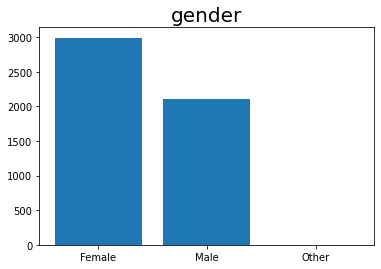

In [ ]:
var = x.groupby('gender')['gender'].count()
plt.title('gender', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1, 2])
plt.show()

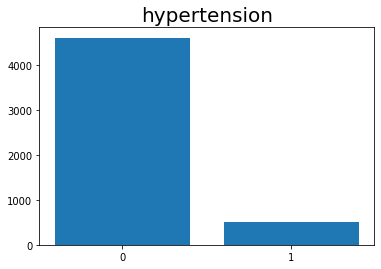

In [ ]:
var = x.groupby('hypertension')['hypertension'].count()
plt.title('hypertension', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1])
plt.show()

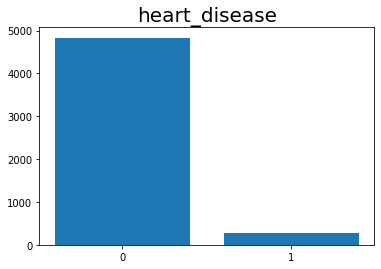

In [ ]:
var = x.groupby('heart_disease')['heart_disease'].count()
plt.title('heart_disease', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1])
plt.show()

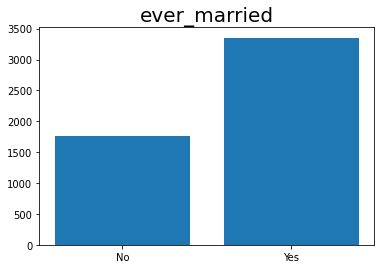

In [ ]:
var = x.groupby('ever_married')['ever_married'].count()
plt.title('ever_married', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1])
plt.show()

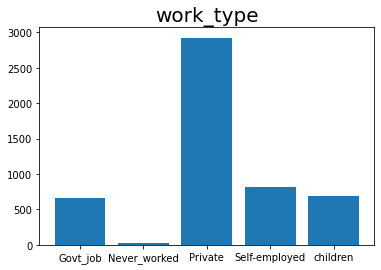

In [ ]:
var = x.groupby('work_type')['work_type'].count()
plt.title('work_type', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1, 2, 3, 4])
plt.show()

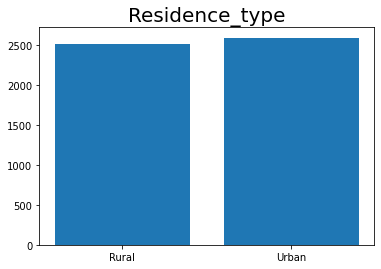

In [ ]:
var = x.groupby('Residence_type')['Residence_type'].count()
plt.title('Residence_type', fontsize=20)
plt.bar(var.index, var) 
plt.xticks([0, 1])
plt.show()

## 연속형 변수 탐색

연령을 살펴보면 60-80대가 많은 것으로 나타났으며, 혈당의 경우에도 90정도의 정상 혈당과 200이 넘는 혈당이 많이 분포하는 것으로 나타났다. bmi역시 30을 평균으로 분포하는 것으로 파악되었다. 

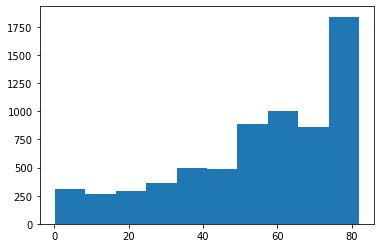

In [ ]:
plt.hist(x_train['age'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


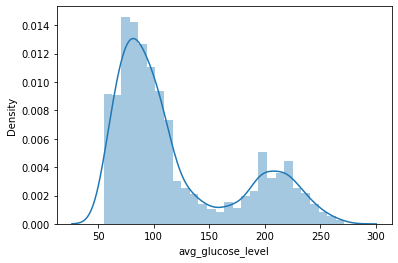

In [ ]:
sns.distplot(x_train['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


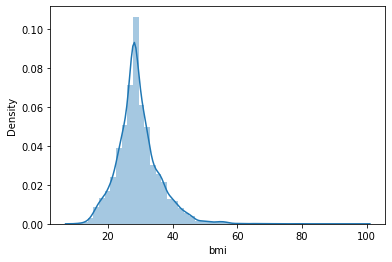

In [ ]:
sns.distplot(x_train['bmi'])

## 산점도

bmi, 혈당, 나이 변수들간의 상관관계가 있는지 시각적으로 알아보기 위해 산점도를 그려보았다. 혈당-bmi, 혈당-나이, 나이-bmi 모두 양의 상관관계가 있을것으로 예측하였으나 눈으로는 뚜렸한 상관관계를 확정하기에는 어려움이 따랐다. 

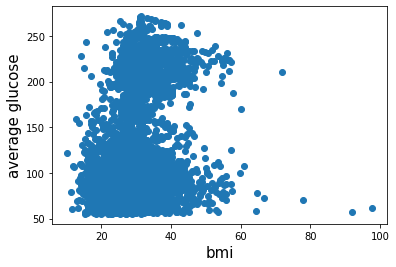

In [ ]:
plt.scatter(x_train['bmi'],x_train['avg_glucose_level']) 
plt.xlabel('bmi', fontsize=15)
plt.ylabel('average glucose',fontsize=15)
plt.show()

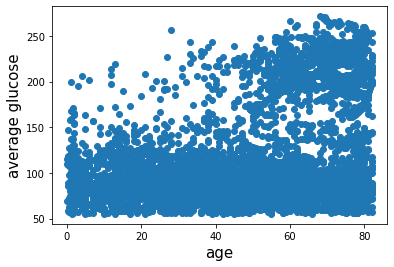

In [ ]:
plt.scatter(x_train['age'],x_train['avg_glucose_level']) 
plt.xlabel('age', fontsize=15)
plt.ylabel('average glucose',fontsize=15)
plt.show()

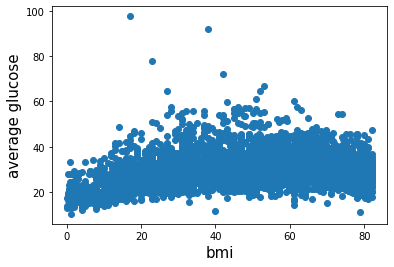

In [ ]:
plt.scatter(x_train['age'],x_train['bmi']) 
plt.xlabel('bmi', fontsize=15)
plt.ylabel('average glucose',fontsize=15)
plt.show()

## 상자그림

상자그림을 통해서 5가지 요약수치를 파악해보고 이상치도 탐색해 보았다. bmi의 경우에는 49이상 수치부터 이상치로 파악되었으며, 혈당은 220부터 이상치로 파악되었다. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


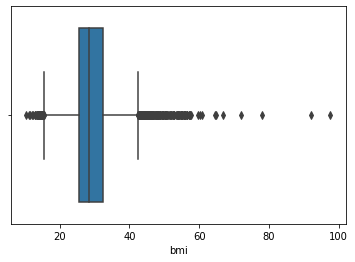

In [ ]:
sns.boxplot(x_train['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


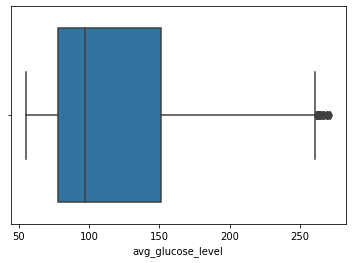

In [ ]:
sns.boxplot(x_train['avg_glucose_level'])

## Violin Plot

바이올린 플랏을 통해 각각 혈당, bmi, 나이 변수에 따라 뇌졸증이 있는 사람과 없는 사람의 해당 변수의 분폴를 살펴볼 수 있다. 혈당수치를 살펴보면 뇌졸중이 있는 사람은 윗부분이 두텁지만 아래부분은 정상인에 비해 오목한 것을 확인 할 수 있다. bmi에서는 뇌졸증 있는사람이 평균에 조금더 쏠려 있는 모습을 보여주었다. 뇌졸증이 있는 사람의 바이올린 플랏이 위쪽으로 치우쳐져 있는 모습을 보아 나이가 많을 수록 뇌졸증이 많이 발생한다는 것을 확인할 수 있다. 

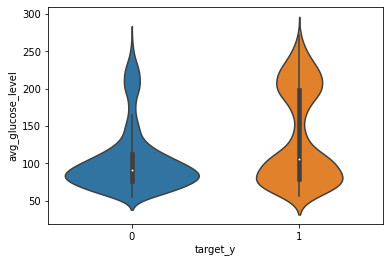

In [ ]:
sns.violinplot(x="target_y", y="avg_glucose_level", data=pd.concat([x_train,y_train], axis=1))

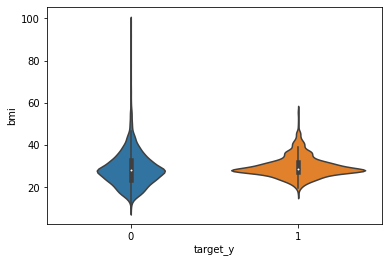

In [ ]:
sns.violinplot(x="target_y", y="bmi", data=pd.concat([x_train,y_train], axis=1))

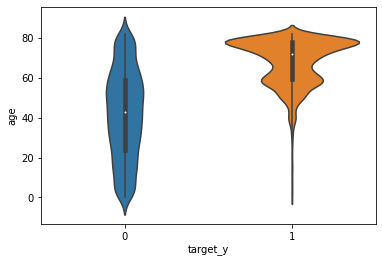

In [ ]:
sns.violinplot(x="target_y", y="age", data=pd.concat([x_train,y_train], axis=1))

# Outlier

이상치는 극단적으로 크거나 작은 값으로 스케일링 전에 해당 값들을 제거하여 왜곡되는 현상을 방지하는 작업이다. bmi의 경우에는 바이올린 플랏에서 확인하였을때 정상과 비정상 모두에서 확인되었기 때문에 이상치를 제거하여 스케일링에서 왜곡이 발생하지 않게 하였다. 

In [ ]:
import numpy as np


In [ ]:
q1, q3 = np.nanpercentile(x_train['bmi'], [25,75])
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
x_train.loc[x_train['bmi'] < lower_bound, 'bmi'] = x_train['bmi'].mean()
x_train.loc[x_train['bmi'] > upper_bound, 'bmi'] = 40 #평균보다 큰 임의의 값 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


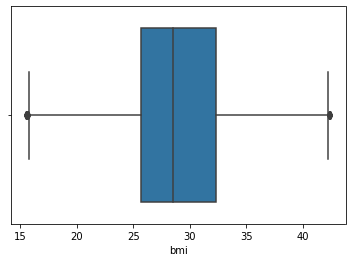

In [ ]:
sns.boxplot(x_train['bmi'])

In [ ]:
q1, q3 = np.nanpercentile(x_train['avg_glucose_level'], [25,75])
iqr = q3-q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)
x_train.loc[x_train['avg_glucose_level'] < lower_bound, 'avg_glucose_level'] = x_train['avg_glucose_level'].mean()
x_train.loc[x_train['avg_glucose_level'] > upper_bound, 'avg_glucose_level'] = 180 #평균보다 큰 임의의 값 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


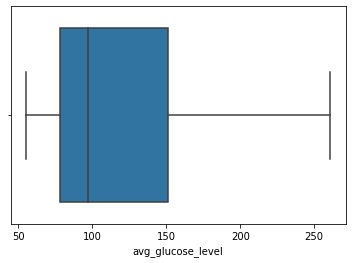

In [ ]:
sns.boxplot(x_train['avg_glucose_level'])

# Categorical Encoding

텍스트 등으로 구성된 범주형 변수를 모델링에 사용할 수 있게 Categorical encoding을 해준다.Categorical encoding은 두종류가 있는데 Label encoding을 할경우 순서형 자료의 경우는 유용하게 사용가능하나 순서가 없는 자료에 사용하게 되면 순서를 임의로 부여하게 되므로 One hot encoding을 사용하였다. One hot encoding은 범주형 데이터를 0과 1로 이루어진 벡터로 표현하여 Label encoding의 문제를 해결하였다. 

In [ ]:
num_column=['age','avg_glucose_level','bmi']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
categori_column = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'Residence_type']
                      

onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoder.fit(x_train[categori_column])


x_train_one = onehot_encoder.transform(x_train[categori_column])
x_test_one = onehot_encoder.transform(x_test[categori_column])


x_train_one

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [ ]:
onehot_column = onehot_encoder.get_feature_names_out(categori_column)
onehot_column

array(['gender_Female', 'gender_Male', 'gender_Other', 'hypertension_0',
       'hypertension_1', 'heart_disease_0', 'heart_disease_1',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban'], dtype=object)

In [ ]:
x_train_one_df = pd.DataFrame(x_train_one, columns=onehot_column, index=x_train.index)
x_train_one_df.head()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
9544,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5728,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4432,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7269,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4287,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
x_train_one_df.describe()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
count,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000,6805.000000
mean,0.581925,0.417928,0.000147,0.888611,0.111389,0.931815,0.068185,0.188538,0.811462,0.080676,0.001763,0.669214,0.176782,0.071565,0.439971,0.560029
std,0.493279,0.493254,0.012122,0.314636,0.314636,0.252082,0.252082,0.391170,0.391170,0.272357,0.041959,0.470531,0.381512,0.257785,0.496420,0.496420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_test_one_df = pd.DataFrame(x_test_one, columns=onehot_column, index=x_test.index)
x_test_one_df.head()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
1713,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
711,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3144,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3786,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4550,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
x_test_one_df.describe()

,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
count,2917.000000,2917.000000,2917.0,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,0.582791,0.417209,0.0,0.887899,0.112101,0.931094,0.068906,0.194721,0.805279,0.083305,0.003428,0.663010,0.181694,0.068564,0.442235,0.557765
std,0.493183,0.493183,0.0,0.315545,0.315545,0.253338,0.253338,0.396053,0.396053,0.276390,0.058460,0.472762,0.385658,0.252754,0.496737,0.496737
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Scaling

연속형변수의 분포를 살펴본 결과 모두 다른 스케일을 갖고있어 스케일에 영향을 받기에 스케일링을 해주었다. Normalizer를 사용하여 원점으로 부터 1씩 떨어져있는 범위 내로 변환, 학습이 빨라지며 과적합을 방지시켰다.또한 추가로 minmax scaler를 사용하였다. 위에서 이상치를 제거해주었으므로 Robustscaler는 고려하지 않았으며 bell shape이 아닌경우 효과적이기에 사용했다.

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_std = normalizer.fit_transform(x_train[num_column])
X_test_std = normalizer.transform(x_test[num_column])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


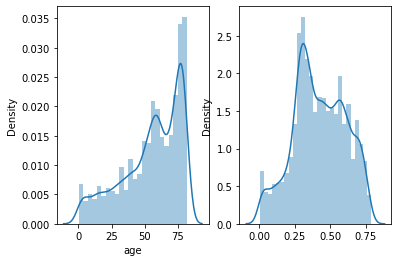

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,0], ax=ax[0])
sns.distplot(X_train_std[:,0], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


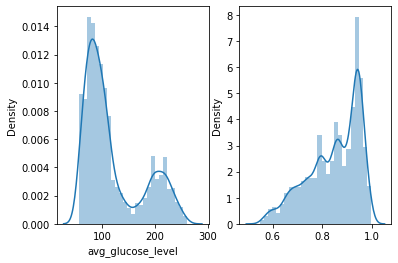

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,7], ax=ax[0])
sns.distplot(X_train_std[:,1], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


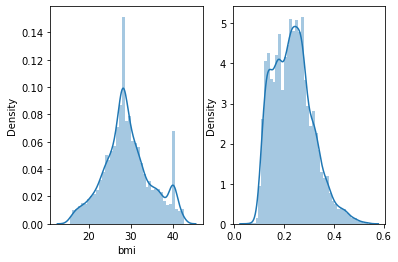

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,8], ax=ax[0])
sns.distplot(X_train_std[:,2], ax=ax[1])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train_std = minmax_scaler.fit_transform(x_train[num_column])
X_test_std = minmax_scaler.transform(x_test[num_column])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


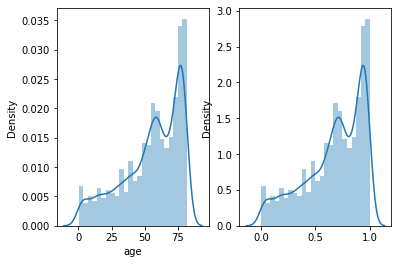

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,0], ax=ax[0])
sns.distplot(X_train_std[:,0], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


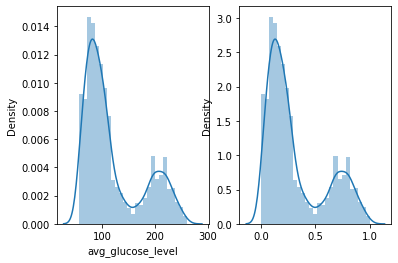

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,7], ax=ax[0])
sns.distplot(X_train_std[:,1], ax=ax[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


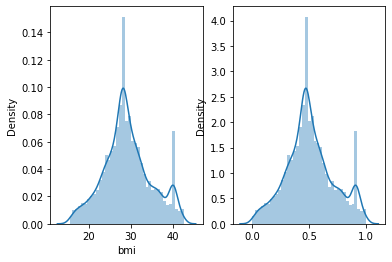

In [ ]:
fig, ax = plt.subplots(ncols=2)
sns.distplot(x_train.iloc[:,8], ax=ax[0])
sns.distplot(X_train_std[:,2], ax=ax[1])